## Question (d) - Steepest ascent 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Randomly split data

In [2]:
X = pd.read_csv('X.csv', header = None)
y = pd.read_csv('y.csv', header = None)

y = y.replace(0, -1)
X['1s'] = 1
X_y_combined = pd.concat([X, y], axis=1, sort=False)

In [3]:
shuffled_data = X_y_combined.sample(frac=1)

In [4]:
data1 = shuffled_data.iloc[0:460,:]
data2 = shuffled_data.iloc[460:920,:]
data3 = shuffled_data.iloc[920:1380,:]
data4 = shuffled_data.iloc[1380:1840,:]
data5 = shuffled_data.iloc[1840:2300,:]
data6 = shuffled_data.iloc[2300:2760,:]
data7 = shuffled_data.iloc[2760:3220,:]
data8 = shuffled_data.iloc[3220:3680,:]
data9 = shuffled_data.iloc[3680:4140,:]
data10 = shuffled_data.iloc[4140:4600,:]

In [5]:
#1-9 V.S. 10
result1 = data1.append([data2, data3, data4, data5, data6, data7, data8, data9])
X_train_1 = result1.iloc[:,0:55]
y_train_1 = result1.iloc[:,-1]
X_test_1 = data10.iloc[:,0:55]
y_test_1 = data10.iloc[:,-1]

#1-8,10, V.S. 9
result2 = data1.append([data2, data3, data4, data5, data6, data7, data8, data10])
X_train_2 = result2.iloc[:,0:55]
y_train_2 = result2.iloc[:,-1]
X_test_2 = data9.iloc[:,0:55]
y_test_2 = data9.iloc[:,-1]

#8
result3 = data1.append([data2, data3, data4, data5, data6, data7, data9, data10])
X_train_3 = result3.iloc[:,0:55]
y_train_3 = result3.iloc[:,-1]
X_test_3 = data8.iloc[:,0:55]
y_test_3 = data8.iloc[:,-1]

#7
result4 = data1.append([data2, data3, data4, data5, data6, data8, data9, data10])
X_train_4 = result4.iloc[:,0:55]
y_train_4 = result4.iloc[:,-1]
X_test_4 = data7.iloc[:,0:55]
y_test_4 = data7.iloc[:,-1]

#6
result5 = data1.append([data2, data3, data4, data5, data7, data8, data9, data10])
X_train_5 = result5.iloc[:,0:55]
y_train_5 = result5.iloc[:,-1]
X_test_5 = data6.iloc[:,0:55]
y_test_5 = data6.iloc[:,-1]

#5
result6 = data1.append([data2, data3, data4, data6, data7, data8, data9, data10])
X_train_6 = result6.iloc[:,0:55]
y_train_6 = result6.iloc[:,-1]
X_test_6 = data5.iloc[:,0:55]
y_test_6 = data5.iloc[:,-1]

#4
result7 = data1.append([data2, data3, data5, data6, data7, data8, data9, data10])
X_train_7 = result7.iloc[:,0:55]
y_train_7 = result7.iloc[:,-1]
X_test_7 = data4.iloc[:,0:55]
y_test_7 = data4.iloc[:,-1]

#3
result8 = data1.append([data2, data4, data5, data6, data7, data8, data9, data10])
X_train_8 = result8.iloc[:,0:55]
y_train_8 = result8.iloc[:,-1]
X_test_8 = data3.iloc[:,0:55]
y_test_8 = data3.iloc[:,-1]

#2
result9 = data1.append([data3, data4, data5, data6, data7, data8, data9, data10])
X_train_9 = result9.iloc[:,0:55]
y_train_9 = result9.iloc[:,-1]
X_test_9 = data2.iloc[:,0:55]
y_test_9 = data2.iloc[:,-1]

#1
result10 = data2.append([data3, data4, data5, data6, data7, data8, data9, data10])
X_train_10 = result10.iloc[:,0:55]
y_train_10 = result10.iloc[:,-1]
X_test_10 = data1.iloc[:,0:55]
y_test_10 = data1.iloc[:,-1]

Implement steepest ascent algorithm

In [7]:
def steepest_ascent(Xdata, ydata, rate, num_iters):
    """
    Retrun two lists: 'new_cw' and 'cost_lst', new_cw contains new w learned 
    after runing num_iters iterations, cost_lst contains costs per iterations.
    
    @Xdata: X dataset
    @ydata: y dataset
    @rate: learning rate
    @num_iters: number of iterations will perform
    """
    cost_lst = []
    cur_w = np.array([0] * 55) #inital w, w=0
    new_cw = np.array([0] * 55)
    iters = 0
    
    while iters < num_iters:
        cur_w = new_cw
        iterate_over_rows = np.arange(Xdata.shape[0])
        sum_acc = 0
        for i in iterate_over_rows: #get sum
            x_array = Xdata.iloc[i].values
            part1 = math.e**(ydata.iloc[i]*np.inner(x_array, cur_w)) #e term
            part2 = part1/(1+part1) #sigma(y*w)
            sum_term_component=np.array((1-part2))*np.array(ydata.iloc[i])*x_array
            sum_acc += sum_term_component #sum_acc now a 1*55 array
        new_cw = cur_w + rate*sum_acc  #new w we get after one iteration
        
        #update cost function
        cost_acc = 0
        for i in iterate_over_rows:
            x_array = Xdata.iloc[i].values
            part1 = math.e**(ydata.iloc[i]*np.inner(x_array, new_cw)) #e term
            part2 = part1/(1+part1)
            cost_component = math.log(part2)
            cost_acc += cost_component
        cost_lst.append(cost_acc) #cost list
        
        iters += 1
    return new_cw, cost_lst 

steepest ascent for 10 Corss Validation

In [8]:
new_cw1, cost_lst1 = steepest_ascent(X_train_1, y_train_1, 0.01/4600, 1000)

In [12]:
new_cw2, cost_lst2 = steepest_ascent(X_train_2, y_train_2, 0.01/4600, 1000)

In [13]:
new_cw3, cost_lst3 = steepest_ascent(X_train_3, y_train_3, 0.01/4600, 1000)

In [14]:
new_cw4, cost_lst4 = steepest_ascent(X_train_4, y_train_4, 0.01/4600, 1000)

In [15]:
new_cw5, cost_lst5 = steepest_ascent(X_train_5, y_train_5, 0.01/4600, 1000)

In [16]:
new_cw6, cost_lst6 = steepest_ascent(X_train_6, y_train_6, 0.01/4600, 1000)

In [17]:
new_cw7, cost_lst7 = steepest_ascent(X_train_7, y_train_7, 0.01/4600, 1000)

In [18]:
new_cw8, cost_lst8 = steepest_ascent(X_train_8, y_train_8, 0.01/4600, 1000)

In [19]:
new_cw9, cost_lst9 = steepest_ascent(X_train_9, y_train_9, 0.01/4600, 1000)

In [20]:
new_cw10, cost_lst10=steepest_ascent(X_train_10,y_train_10,0.01/4600, 1000)

Text(0, 0.5, 'L')

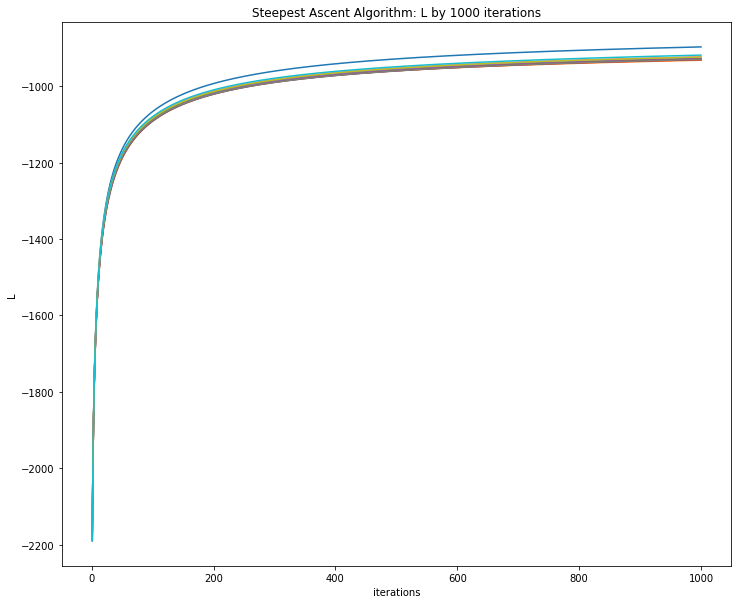

In [82]:
x_plot = np.arange(1,1001,1)
plt.figure(figsize=(12,10))
plt.plot(x_plot,cost_lst1)
plt.plot(x_plot,cost_lst2)
plt.plot(x_plot,cost_lst3)
plt.plot(x_plot,cost_lst4)
plt.plot(x_plot,cost_lst5)
plt.plot(x_plot,cost_lst6)
plt.plot(x_plot,cost_lst7)
plt.plot(x_plot,cost_lst8)
plt.plot(x_plot,cost_lst9)
plt.plot(x_plot,cost_lst10)
plt.title('Steepest Ascent Algorithm: L by 1000 iterations')
plt.xlabel('iterations')
plt.ylabel('L')

## Question(e) - Newton Method

In [23]:
def newton(Xdata, ydata, num_iters):
    """
    Return learned logistic regression coefficients(w) and objective 
    function after num_iters iterations.
    """
    cur_w = np.array([0] * 55) #inital w, w=0
    new_cw = np.array([0] * 55)

    iters = 0
    cost_lst=[]
    while iters < num_iters:
        cur_w = new_cw
        acc_1storder = 0
        iterate_over_rows = np.arange(Xdata.shape[0])
        cost_1stcomponent = 0
        for i in iterate_over_rows: #get sum over rows
            #e^yXw term
            part1 = np.exp(float(np.array(ydata.iloc[i])*np.inner(Xdata.iloc[i].
                                                                  values, cur_w)))
            #part1 = math.e**exp_term #e^yXw term
            part2 = part1/(1+part1) #sigma(yxw)
            first_order_component = np.array((1-part2))*np.array(ydata.
                                                                 iloc[i])*Xdata.iloc[i]
            acc_1storder += first_order_component #sum_acc now a 1*55 array
            snd_order_component = -np.array(part1/((1+part1)**2))
            Lwt = np.log(part2)
            cost_1stcomponent += Lwt
                
        
        fst_gradiet = np.matrix(acc_1storder).reshape(-1,1)  #55*1
        sec_gradient = np.matmul(np.matrix(Xdata).T,np.matrix(Xdata)) #55*55
        hessian = snd_order_component*sec_gradient
        inv_hessian = np.linalg.inv(hessian) 
        #print(hessian)
        new_cw = cur_w - inv_hessian.dot(acc_1storder) 
        
        #cost_2nd = (new_cw-cur_w).T*fst_gradiet
        cost_2nd = float(np.matmul((new_cw-cur_w),fst_gradiet)) #w-wt: 1*55
        #cost_3rd = (new_cw-cur_w).T*sec_gradient
        cost_3rd_part1 = np.matmul((new_cw-cur_w),hessian)
        cost_3rd = 1/2*(float(np.matmul(cost_3rd_part1,(new_cw-cur_w).T)))
        cost = cost_1stcomponent+cost_2nd+cost_3rd
        cost_lst.append(cost)
        
        iters+=1
    
    return new_cw, cost_lst

In [80]:
def newton2(Xdata, ydata, num_iters):
    """
    Return learned logistic regression coefficients(w) and objective function 
    after num_iters iterations.But add 10^-6 to diagonal before inverting 
    hessian matrix.
    """
    cur_w = np.array([0] * 55) #inital w, w=0
    new_cw = np.array([0] * 55)

    iters = 0
    cost_lst=[]
    while iters < num_iters:
        cur_w = new_cw
        acc_1storder = 0
        iterate_over_rows = np.arange(Xdata.shape[0])
        cost_1stcomponent = 0
        for i in iterate_over_rows: #get sum over rows
            #e^yXw term
            part1 = np.exp(float(np.array(ydata.iloc[i])*np.inner(Xdata.iloc[i].
                                                                  values, cur_w)))
            #part1 = math.e**exp_term #e^yXw term
            part2 = part1/(1+part1) #sigma(yxw)
            first_order_component=np.array((1-part2))*np.array(ydata.
                                                               iloc[i])*Xdata.iloc[i]
            acc_1storder += first_order_component #sum_acc now a 1*55 array
            snd_order_component = -np.array(part1/((1+part1)**2))
            Lwt = np.log(part2)
            cost_1stcomponent += Lwt
                
        
        fst_gradiet = np.matrix(acc_1storder).reshape(-1,1)  #55*1
        sec_gradient = np.matmul(np.matrix(Xdata).T,np.matrix(Xdata)) #55*55
        hessian = snd_order_component*sec_gradient
        
        a = np.array([math.pow(10,-6)]*55).reshape(1,-1)
        d = np.matrix(np.diag(a[0]))
        hessian_2 = hessian - d
        
        inv_hessian = np.linalg.inv(hessian_2) 
        #print(hessian)
        
        #if np.isnan(cur_w).any() == True: #if has nan return Ture
            #return cur_w, cost_lst
        
        new_cw = cur_w - inv_hessian.dot(acc_1storder) 
        
        #cost_2nd = (new_cw-cur_w).T*fst_gradiet
        cost_2nd = float(np.matmul((new_cw-cur_w),fst_gradiet)) #w-wt: 1*55
        #cost_3rd = (new_cw-cur_w).T*sec_gradient
        cost_3rd_part1 = np.matmul((new_cw-cur_w),hessian)
        cost_3rd = 1/2*(float(np.matmul(cost_3rd_part1,(new_cw-cur_w).T)))
        cost = cost_1stcomponent+cost_2nd+cost_3rd
        cost_lst.append(cost)
        
        
        iters+=1
    
    return new_cw, cost_lst

In [90]:
newton_w1, newton_cost1 = newton2(X_train_1, y_train_1, 100)

In [27]:
newton_w2, newton_cost2 = newton(X_train_2, y_train_2, 100)

In [28]:
newton_w3, newton_cost3 = newton(X_train_3, y_train_3, 100)

In [29]:
newton_w4, newton_cost4 = newton(X_train_4, y_train_4, 100)

In [30]:
newton_w5, newton_cost5 = newton(X_train_5, y_train_5, 100)

In [31]:
newton_w6, newton_cost6 = newton(X_train_6, y_train_6, 100)

In [32]:
newton_w7, newton_cost7 = newton(X_train_7, y_train_7, 100)

In [33]:
newton_w8, newton_cost8 = newton(X_train_8, y_train_8, 100)

In [34]:
newton_w9, newton_cost9 = newton(X_train_9, y_train_9, 100)

In [35]:
newton_w10, newton_cost10=newton(X_train_10, y_train_10,100)

Plot Graph

Text(0, 0.5, 'L')

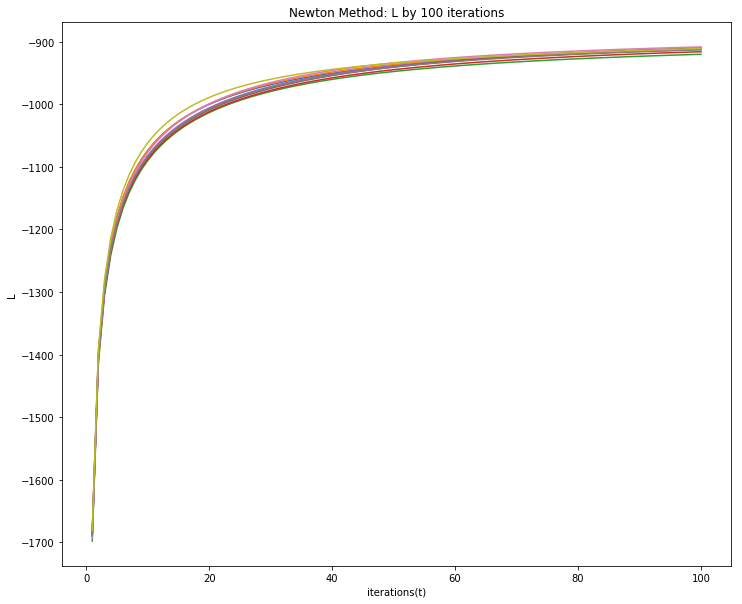

In [100]:
x_plot = np.arange(1,101,1)
plt.figure(figsize=(12,10))
plt.plot(x_plot,newton_cost1)
plt.plot(x_plot,newton_cost2)
plt.plot(x_plot,newton_cost3)
plt.plot(x_plot,newton_cost4)
plt.plot(x_plot,newton_cost5)
plt.plot(x_plot,newton_cost6)
plt.plot(x_plot,newton_cost7)
plt.plot(x_plot,newton_cost8)
plt.plot(x_plot,newton_cost9)
plt.plot(x_plot,newton_cost10)
plt.title('Newton Method: L by 100 iterations')
plt.xlabel('iterations(t)')
plt.ylabel('L')

## Question (f) Logistic Regression Prediction

In [50]:
def get_pred_result(X_test, y_test, w):
    """
    Return TP, TN, FP, FN
    """
    temp = np.matmul(np.matrix(X_test),w.T)
    pro_lst = temp.T.tolist()[0]
    pred_result = []
    for item in pro_lst:
        if item >=0.5:
            pred_result.append(1)
        else:
            pred_result.append(-1)
            
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    true_list = y_test.tolist()
    indice_list = np.arange(len(pred_result))
    for i in indice_list:
        if pred_result[i]==1 and true_list[i]==1:
            TP += 1
        elif pred_result[i]==-1 and true_list[i]==1:
            FN += 1
        elif pred_result[i]==1 and true_list[i]==-1:
            FP += 1
        elif pred_result[i]==-1 and true_list[i]==-1:
            TN += 1
    return TP, FN, FP, TN

In [67]:
TP1, FN1, FP1, TN1 = get_pred_result(X_test_1,y_test_1, newton_w1)
TP2, FN2, FP2, TN2 = get_pred_result(X_test_2,y_test_2, newton_w2)
TP3, FN3, FP3, TN3 = get_pred_result(X_test_3,y_test_3, newton_w3)
TP4, FN4, FP4, TN4 = get_pred_result(X_test_4,y_test_4, newton_w4)
TP5, FN5, FP5, TN5 = get_pred_result(X_test_5,y_test_5, newton_w5)
TP6, FN6, FP6, TN6 = get_pred_result(X_test_6,y_test_6, newton_w6) 
TP7, FN7, FP7, TN7 = get_pred_result(X_test_7,y_test_7, newton_w7)
TP8, FN8, FP8, TN8 = get_pred_result(X_test_8,y_test_8, newton_w8)
TP9, FN9, FP9, TN9 = get_pred_result(X_test_9,y_test_9, newton_w9)
TP10, FN10, FP10, TN10 = get_pred_result(X_test_10,y_test_10, newton_w10)

In [68]:
total_TP = TP1 + TP2 + TP3 + TP4 + TP5 + TP6 + TP7 + TP8 + TP9 + TP10  
total_FN = FN1 + FN2 + FN3 + FN4 + FN5 + FN6 + FN7 + FN8 + FN9 + FN10
total_FP = FP1 + FP2 + FP3 + FP4 + FP5 + FP6 + FP7 + FP8 + FP9 + FP10
total_TN = TN1 + TN2 + TN3 + TN4 + TN5 + TN6 + TN7 + TN8 + TN9 + TN10 
total = total_TP+total_FN+total_FP+total_TN
total_TP,total_FN,total_FP,total_TN

(1499, 314, 126, 2661)

In [69]:
from IPython.display import display
data = [('TP: 1499', 'FP: 126'),('FN: 314', 'TN: 2661')]
df = pd.DataFrame(data)
df = df.rename({0: 'Predicted Postive', 1: 'Predicted Negative'}, axis='index')
df = df.rename({0: 'Actual Postive', 1: 'Actual Negative'}, axis='columns')
display(df)

,Actual Postive,Actual Negative
Predicted Postive,TP: 1499,FP: 126
Predicted Negative,FN: 314,TN: 2661


In [70]:
accuracy = (total_TP+total_TN)/(total_TP+total_FN+total_FP+total_TN)
print("Accuracy of Logistic Regression(Newton Method): {}".format(accuracy))

Accuracy of Logistic Regression(Newton Method): 0.9043478260869565
